# Homework 4

## 1) Does basic house information reflect house's description?

In this assignment we will perform a clustering analysis of house announcements in Rome from Immobiliare.it. Be careful you may notice that the announcement is written in Italian. Don't worry about it, you don't need to understand what's in it.

![alt text](https://directionscu.org/wp-content/uploads/2018/08/cashforhome.png "Logo Title Text 1")

____ 

# VERY VERY IMPORTANT
__!!!Read the entire homework before coding anything!!!__

__We strongly suggest you to run the entire scraping procedure at your place!__
____

### Goal
 You will implement two clustering and compare the results you get. You will need to create two datasets and each of them will be filled by data that you scraped.

### Scraping
This time, you must create your dataset. The website that you will scrape is: [here](https://www.immobiliare.it). In particular, you should retrieve at least 10k announcements starting from this [link](https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=1).
The information that you need to extract is explained afterwords. Remember, whenever you have text to work on, do some pre-processing. Use the [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to parse the `html`. Make sure to put a [`time.sleep(t)`](https://www.tutorialspoint.com/python/time_sleep.htm), where *t* is the number of seconds, to prevent the website block. It might take a while, be patient.


### Datasets 
#### 1) Information
The first matrix will have this format: <img src="https://latex.codecogs.com/gif.latex?$m_{ij}&space;=&space;value$" title="$m_{ij} = value$" /> where <img src="https://latex.codecogs.com/gif.latex?$i&space;\in&space;\{announcement_1,&space;...,&space;announcement_n\}$" title="$i \in \{announcement_1, ..., announcement_n\}$" /> and <img src="https://latex.codecogs.com/gif.latex?$j&space;\in&space;\{price,&space;locali,&space;superficie,&space;bagni,&space;piano&space;\}$" title="$j \in \{price, locali, superficie, bagni, piano \}$" />. *n* is the number of the announcements. It's possible that not all the announcements will have all the fields mentioned above, if it's the case don't take it into account. 

#### 2) Description
The second matrix will have this format: <img src="https://latex.codecogs.com/gif.latex?$m_{ij}&space;=&space;tfIdf_{ij}$" title="$m_{ij} = tfIdf_{ij}$" /> where <img src="https://latex.codecogs.com/gif.latex?$i&space;\in&space;\{announcement_1,&space;...,&space;announcement_n\}$" title="$i \in \{announcement_1, ..., announcement_n\}$" /> and <img src="https://latex.codecogs.com/gif.latex?$j&space;\in&space;\{word_1,&space;...,word_m\}$" title="$j \in \{word_1, ...,word_m\}$" />. *n* is the number of the announcements and *m* is the cardinality of the vocabulary. This time, you must implement the *Tf-Idf* by yourself (not with libraries). Make sure to use the complete description inside the link of the announcement: [example](https://www.immobiliare.it/69900102-Vendita-Bilocale-viale-Ezra-Pound-Roma.html).

### Clustering
This step consists in clustering the house announcements using K-means++. In order to do that you can use [this](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Python library. Choose the optimal number of clusters using the [Elbow-Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

### Comparison among cluster
We expect that both datasets will lead to similar clusters. Is this true?
#### Find similar clusters
To check this, use the Jaccard-Similarity to measure the similarity betweeen the two outputs (information clusters vs description clusters). Return the 3-most similar couples of clusters.
#### Word cloud of house descriptions
With this last output you must create a [wordcloud](https://www.datacamp.com/community/tutorials/wordcloud-python) for each couple of clusters. The words that will be represented are those extracted from the description of the houses that are in the relative couple.

<div style="text-align:center"><img src ="https://d791hlskfkbjh.cloudfront.net/7731287/980x.jpg" /></div>


In [31]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import csv
import re

We'll scrape some data from the website starting from this url:

https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=1

In the url we can notice a parameter referring to the pagination of the results, divided in pages. Each of this pages contains 25 announces.

In order to reach at least 10.000 announces, we need to scrape at least 400 pages.

First we create the function that returns the urls of the announces inside a page.

In [32]:
def get_announces(url):
    # http://docs.python-requests.org/en/v1.0.0/
    response = get(url)
    # in text you have the html page
    #debug
    #print(response.text)
    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/
    html_soup = BeautifulSoup(response.text, 'html.parser')
    #debug
    #print(html_soup.prettify())
    # with this function we look for all the p tag with a class_ attribute with the name of titolo text-primary
    announce_containers = html_soup.find_all('p', class_ = 'titolo text-primary')
    #debug
    #print(type(announce_containers))
    #print(announce_containers)
    
    urls = []
    
    for container in announce_containers:
        if "/nuove_costruzioni/" not in container.a['href']:
            # we extract the link to the right announce excluding "nuove costruzioni"
            urls.append(container.a['href'])
        
    return urls

Let's create a list with all the announces urls we need. We save it in a csv file to avoid scraping all the pages again.

In [46]:
url_list = []

#for i in range(1,2):  #470
#    url = 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag='
#    url_list = url_list + get_announces(url + str(i))

#with open('data/url_list.csv', 'w+', newline='') as myfile:
#    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#    for url in url_list:
#        wr.writerow([url])

In [50]:
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
url_list = pd.read_csv('data/url_list.csv', header=None)
#debug
#url_list.shape gives a tuple with (n_rows, n_columns)
#print(url_list.shape)
#print(url_list)
# this an alternative of print in jupyter
#display(url_list)
#print(url_list[0])
#print(type(url_list))

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
url_list = url_list[0]
#debug
#print(type(url_list))

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.head.html
# here i show the first four entry fo the series
url_list.head()
# debug 
#print(url_list.head())


0    https://www.immobiliare.it/53131931-Vendita-Bi...
1    https://www.immobiliare.it/70085670-Vendita-Bi...
2    https://www.immobiliare.it/70086882-Vendita-Ap...
3    https://www.immobiliare.it/70084602-Vendita-Tr...
4    https://www.immobiliare.it/70085950-Vendita-Tr...
Name: 0, dtype: object

Now we define the function to extract the info we need from the announce page

In [51]:
#data scraping function
def get_data(url):
    # here i extract all the number from the url and get the first
    id = re.findall(r'(\d+)', url)[0] # Get announce ID parsing the url
    
    # extract the webpage again
    response = get(url)

    #debug here we can how the parsing choice has been made to extract the relevant data
    print(response.text)
    
    # build a BS object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    # extract all tag ul with class= list-inline list-piped features__list'
    data_container = html_soup.find('ul', class_ = 'list-inline list-piped features__list')
    
    if data_container is not None:
    
        for item in data_container.children:
            
            # Locate price
            if html_soup.find('li', class_= 'features__price'):
                price = html_soup.find('li', class_= 'features__price').span
                
                # i search for all number
                price = re.sub('[^0-9]+', '', str(price))

            # Locate rooms number
            if item.find('div', class_= 'features__label') and item.find('div', class_= 'features__label').contents[0] == 'locali':
                rooms = item.find('span', class_ = 'text-bold').contents[0]
                rooms = re.sub('[^A-Za-z0-9]+', '', rooms)

            # Locate surface extension
            if item.find('div', class_= 'features__label') and item.find('div', class_= 'features__label').contents[0] == 'superficie':
                area = item.find('span', class_ = 'text-bold').contents[0]
                area = re.sub('[^A-Za-z0-9]+', '', area)

            # Locate bathrooms number    
            if item.find('div', class_= 'features__label') and item.find('div', class_= 'features__label').contents[0] == 'bagni':
                bathrooms = item.find('span', class_ = 'text-bold').contents[0]
                bathrooms = re.sub('[^A-Za-z0-9]+', '', bathrooms)

            # Locate floor number    
            if item.find('div', class_= 'features__label') and item.find('div', class_= 'features__label').contents[0] == 'piano':
                floor = item.find('abbr', class_ = 'text-bold').contents[0]
                floor = re.sub('[^A-Za-z0-9]+', '', floor)

            # Extract the description
            try:
                description = html_soup.find('div', class_ = 'col-xs-12 description-text text-compressed').div.contents[0]
                description = re.sub('[^a-zA-Z0-9-_*. ]', '', description) # Remove special charachters
                description = description.lstrip(' ') # Remove leading blank spaces
            except AttributeError:
                return False
        
    try:
        return [[id,price,rooms,area,bathrooms,floor],[id,description]]
    except NameError:
        return False   

In [52]:
get_data('https://www.immobiliare.it/53131931-Vendita-Bilocale-viale-Italo-Calvino-Roma.html')

<!DOCTYPE html>
<!--[if IE 8]>
<html class="lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="it" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# immobiliare_it: http://ogp.me/ns/fb/immobiliare_it#"> <!--<![endif]-->
<head>
      <link rel="dns-prefetch" href="https://css.im-cdn.it">
    <link rel="dns-prefetch" href="https://js.im-cdn.it">
    <link rel="dns-prefetch" href="https://img.im-cdn.it">
    <!--[if lte IE 10]>
    <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway:400,500&amp;subset=latin">
<![endif]-->
          <style>@charset "UTF-8";.container,.container-fluid{margin-right:auto;margin-left:auto}.container-fluid:after,.container-fluid:before,.container:after,.container:before,.row:after,.row:before{display:table;content:""}.btn-group-vertical>.btn,.btn-group>.btn,.btn-group>.btn-group,.btn-toolbar .btn,.btn-toolbar .btn-group,.btn-toolbar .input-group,.col-xs-0,.col-xs-1,.col-xs-10,.col-xs-11,.col-xs-12,.col-xs-2,.col-xs-3,.col-xs-

[['53131931', '225000', '2', '50', '1', '1'],
 ['53131931',
  'PAPILLO EUR in elegante complesso residenziale rifinitissimo bilocale composto da soggiorno con angolo cottura stanza da letto bagno e ampio balcone . con Rifiniture di pregio pavimenti in parquet  grees infissi in legno con vetro camera e porte in noce grate nel salone riscaldamento termoautonomo con caldaia centralizzata aria condizionata videocitofono porta blindata serramenti elettrici con chiusura centralizzata antenna satellitare isolamento termo acustico pannelli solari e fotovoltaici  rilevatori elettronici di gas. Tutte le camere sono fornite di impianto antifurto presa antenna satellitare e presa telefonica.']]

Now we can iterate the url list extracting all the data to put them in two dataframes.

In order to save execution time for the next runs, we save the two dataframse in two csv files.

In [7]:
data_df = pd.DataFrame(columns = ['ID','Price','Rooms','Area','Bathrooms','Floor'])

description_df = pd.DataFrame(columns = ['ID','Description'])

for i in range(0,len(url_list)):
    
    break # Remove this line to start the scraping
    
    print(url_list[i])
    
    # This while loop is need to retry the request in case of connection error
    while True:
        try:
            # here start the real scraping
            if get_data(url_list[i]):

                # Convert list in dataframe
                row_data = pd.np.asarray(get_data(url_list[i])[0])
                row_data = pd.DataFrame(data=row_data.reshape(1,6), columns= ['ID','Price','Rooms','Area','Bathrooms','Floor'])

                # Append results to data dataframe
                data_df = data_df.append(row_data)

                # Convert list in dataframe
                row_description = pd.np.asarray(get_data(url_list[i])[1])
                row_description = pd.DataFrame(data=row_description.reshape(1,3), columns= ['ID','Description'])

                # Append results to description dataframe
                description_df = description_df.append(row_description)
                
                #with construnctor https://www.html.it/pag/15617/lavorare-con-i-files/
                
                # Create two csv files line by line
                #with open('data/data.csv', 'a') as f:
                #    row_data.to_csv(f, header=False)
                #with open('data/description.csv', 'a') as f:
                #    row_description.to_csv(f, header=False)
        
        # in case of connection error and retry
        except ConnectionError:
            print('Connection Error')
            continue
        break

After extraction completes, we can import data from the csv.
We need to do also some cleaning, like removing duplicates and adding columns names.

In [11]:
data_df = pd.read_csv('data/data.csv',header=None)
# remove column 0 (id)
data_df.drop(columns=[0], inplace=True)
data_df.columns = ['ID','Price','Rooms','Area','Bathrooms','Floor']
# remove duplicates # extract from subset
data_df = data_df.drop_duplicates(subset=['Price','Rooms','Area','Bathrooms','Floor']).reset_index(drop=True)
data_df.head()

,ID,Price,Rooms,Area,Bathrooms,Floor
0,53131931,225000.0,2,50,1,1
1,70085670,300000.0,2,46,1,4
2,70086882,669000.0,5,86,2,4
3,70084602,500000.0,3,89,2,3
4,70085950,425000.0,3,72,2,4


In [13]:
# read the second csv with description
description_df = pd.read_csv('data/description.csv', header=None)
description_df.drop(columns=[0, 2], inplace=True)
description_df.columns = ['ID','Description']
description_df = description_df.drop_duplicates(subset=['Description']).reset_index(drop=True)
description_df.head()

,ID,Description
0,53131931,PAPILLO EUR in elegante complesso residenziale...
1,70085670,Vendesi appartamento in palazzo di nuova costr...
2,70084602,Vendesi appartamento in palazzo di nuova costr...
3,70085240,Piano 3 interno 12
4,53973750,Ti presentiamo Diana complesso residenziale in...


The remainder of the task is being done by the separate class `AdCluster` to be found in the file `AdCluster.py`. After scraping, this class takes the data and description data and clusters it, finds the similar clusters among the two systems and prints out a wordcloud for each cluster individually.

In [54]:
from AdCluster import AdCluster

ModuleNotFoundError: No module named 'nltk'

In [2]:
#https://www.datacamp.com/community/tutorials/k-means-clustering-python
clusterer = AdCluster()

info, desc = clusterer.load_data("data.csv", "description.csv", skip_scrape=True)

'_create_vocab'  0.06 s
'_build_idf'  0.18 s
'_build_invert_idx'  1.50 s
'build_desc_matrix'  36.21 s


We are commencing the clustering now according to the elbow method. To this end, the method will plot us the curve of the score of the respective K-Means fit for various k's (always a range of 10). Afterwards we are asked to choose a k, that we like. If we return the input empty, the method will continue to run for the next 10 k-values and retry asking us for the wanted k.

As it turns out, `k=3`appears to be very much the elbow of the data table and also less pronounced the elbow of the TFIDF table. Further looks as the clustering of the TFIDF table have shown no further elbow though (not shown here) suggesting that this is the only one we will find.

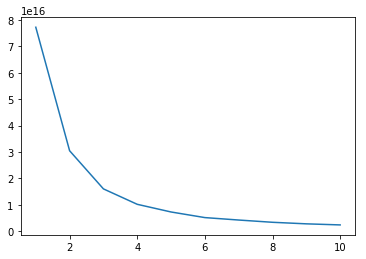

Choose number of clusters: 3


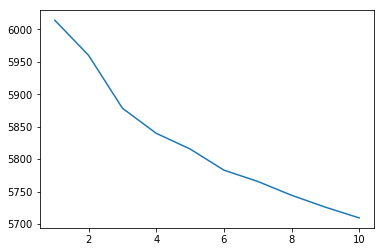

Choose number of clusters: 3


In [3]:
info_cluster = clusterer.cluster_kmeans_elbow(info)
desc_cluster = clusterer.cluster_kmeans_elbow(desc, normalize_=True)

Checking for the similarity between the clusters of the two tables we see, that cluster 2 of the data and cluster 0 of the data appear to have most ad indices in common, suggesting that there is a rather similar cluster to be found within the two systems. Apart from this cluster however, there doesnt seem to be much similarity among the other possible combinations.

In [14]:
# check similar clusters
clusters_sim = clusterer.find_similar_clusters(info_cluster, desc_cluster)
for i in range(3):
    (clust_info, clust_desc), sim = clusters_sim.popitem()
    sim = -sim
    print(f"Data-Cluster: {clust_info}, Description-Cluster: {clust_desc}, Similarity: {100*sim:.1f}%")


Data-Cluster: 2, Description-Cluster: 0, Similarity: 71.3%
Data-Cluster: 0, Description-Cluster: 0, Similarity: 18.9%
Data-Cluster: 2, Description-Cluster: 2, Similarity: 8.8%


As a last step we are plotting the wordclouds. The 3 highest tfidf-valued words are taken from each ad in the cluster and given to the wordcloud to create the image. This is repeated for each cluster witht the output visible below. 

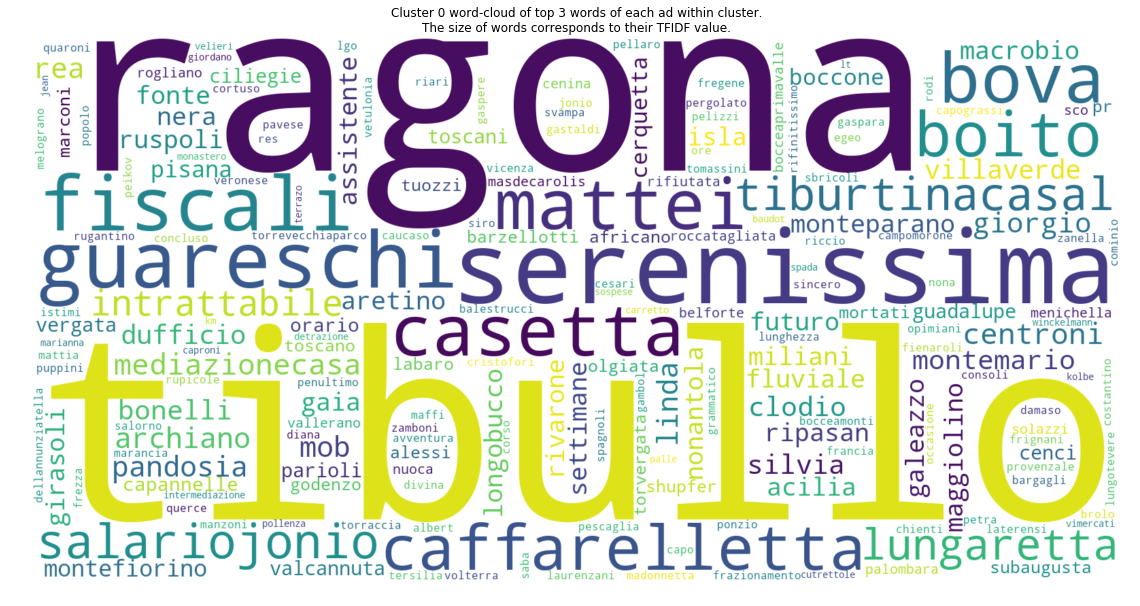

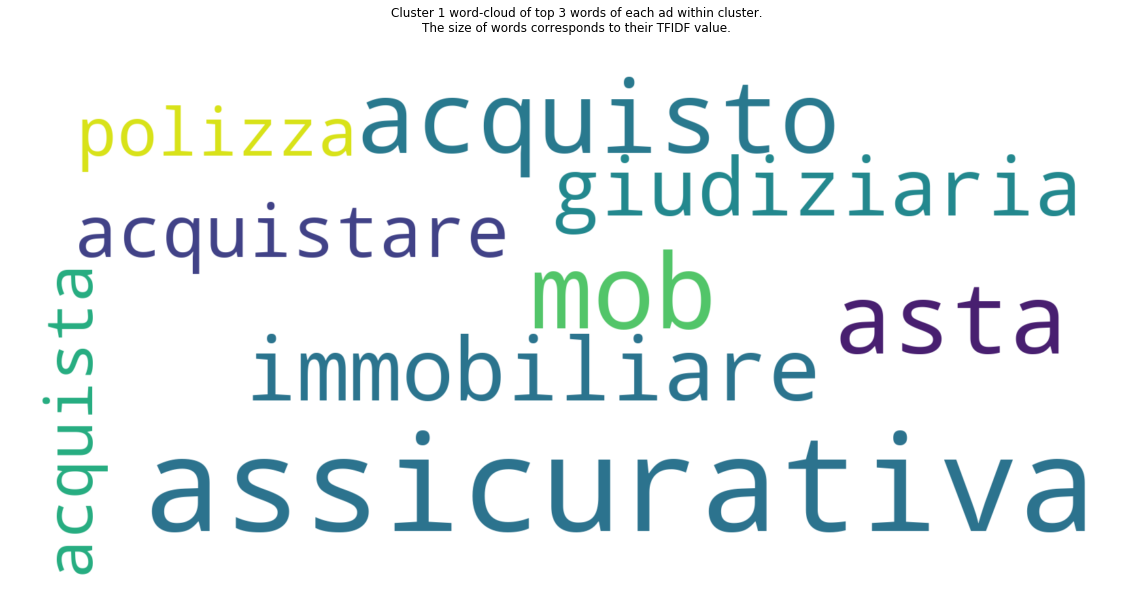

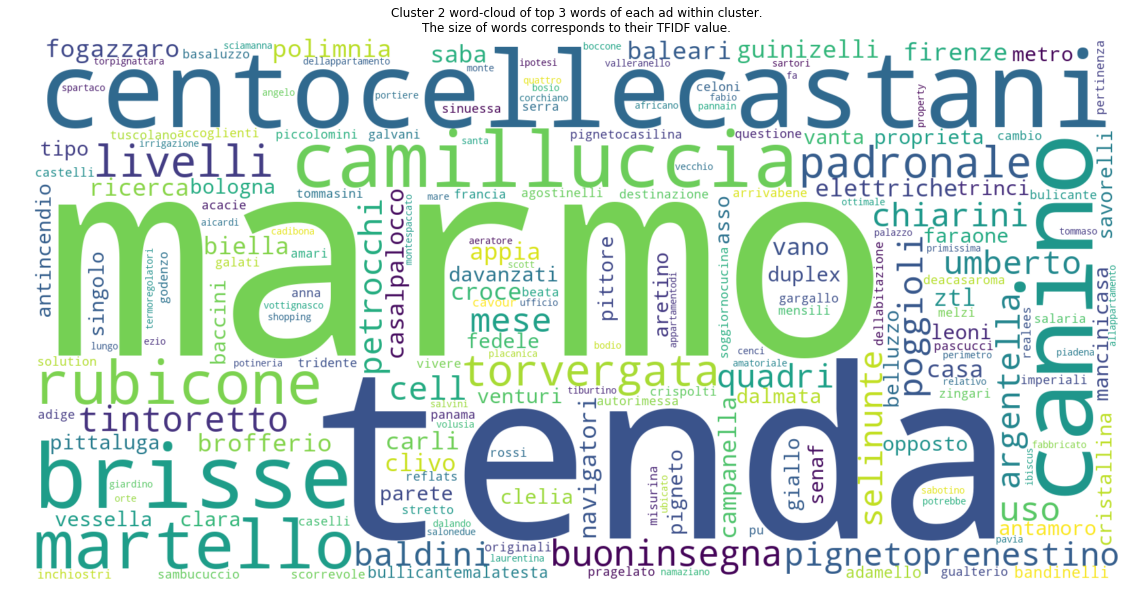

In [5]:
_=clusterer.top_words_clusters(clusterer.desc_sparse_to_dense(desc), desc_cluster.labels_, 3)

# Password Hashing Task 2

In [10]:
import PasswordHashing
from PasswordHashing import PWHash

pwhasher = PWHash()

The second part of the task asks us to hash a huge password file of 110.000.000 passwords and check for collisions among our hashes. 
Two modes are currently implemented: 
- Hashing and analyzing everything in RAM
- Writing the hashes to file and having pandas read the hash and password files afterwards and analyze

The in-memory approach is bound to exceed 8 gb of RAM, thus needs a bigger machine to run on (16 gb might not even be enough). For a lack of resources, it remains untested.
The to-file approach creates another file of hashes several gb big. The subsequent loading into memory of these files proves less costly than keeping it all stored in python dictionaries, and was possible to be run on a laptop.

The approach uses a so-called "Universal Hash Function" which uses two big prime numbers `N, p, N <= p`and two random integer coefficients of size up to p-1 to run a modulo on the input:
`return ((a * x + b) % p) % N`

Choosing p and N to be just slightly smaller prime numbers than `2**32` allows us to stay below the 4 byte mark for each hash to not waste too much memory and still have a range of nearly 4 billion buckets. Details can be found in `PasswordHashing.py`.

Strings were converted to numbers by the following idea:
- For each char c in string compute python ord(c) and concatenate the output numbers to a long string. Afterwards convert this big string of integers to an actual integer through int(int_str).
- If the order of characters was supposed to be ignored, then the string was simply sorted before doing the above mentioned procedure.

In [11]:
# hashing in memory:
# unordered
#pwhasher.hash_stats("passwords2.txt", do_ordered=False)
#ordered
#pwhasher.hash_stats("passwords2.txt", do_ordered=True)

The output shows that we found all 10.000.000 collisions that were mentioned in the exercise and on top of that around 1.1 million false positives in the order-neglecting approach.
Once order is also taken into account, we find 5.000.000 collisions and around 1.2 million false positives.

In [12]:
# hashing to file and evaluting then:
# unordered
pwhasher.hash_pws_to_file("passwords2.txt", PWHash.str_to_nr_unordered)
pwhasher.hash_stats_from_file("passwords2.txt", ordered=False)
# ordered
pwhasher.hash_pws_to_file("passwords2.txt", PWHash.str_to_nr_ordered)
pwhasher.hash_stats_from_file("passwords2.txt", ordered=True)

100%|██████████| 110000000/110000000 [1:21:17<00:00, 22552.33it/s]


Reading strings and hashes from file (strings order neglected)...
Reading password file...


100%|██████████| 110000000/110000000 [15:14<00:00, 120336.86it/s]


Reading hashes file...


100%|██████████| 110000000/110000000 [04:04<00:00, 449271.81it/s]


Files read.
Converting to pandas: ...
Passwords dataframe done (193s).
Hash dataframe done (120).

Joining password and hash dataframe ...
Done (2).

Number of collisions detected: 11155972
True Positives: 10000000
False Positives: 1155972


100%|██████████| 110000000/110000000 [29:47<00:00, 61528.60it/s] 


Reading strings and hashes from file (strings order respected)...
Reading password file...


100%|██████████| 110000000/110000000 [01:24<00:00, 1304777.20it/s]


Reading hashes file...


100%|██████████| 110000000/110000000 [01:34<00:00, 1167459.66it/s]


Files read.
Converting to pandas: ...
Passwords dataframe done (90s).
Hash dataframe done (89).

Joining password and hash dataframe ...
Done (2).

Number of collisions detected: 6274294
True Positives: 5000000
False Positives: 1274294


(6274294, 5000000, 1274294)